Target kolona: groupe A, groupe B - klasifikacija. Encoding, NaN vrednosti. XGBClassifier.

This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them. Column description:

    Gender: Gender of the student (male/female)
    EthnicGroup: Ethnic group of the student (group A to E)
    ParentEduc: Parent(s) education background (from some_highschool to master's degree)
    LunchType: School lunch type (standard or free/reduced)
    TestPrep: Test preparation course followed (completed or none)
    ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)
    PracticeSport: How often the student parctice sport (never/sometimes/regularly))
    IsFirstChild: If the child is first child in the family or not (yes/no)
    NrSiblings: Number of siblings the student has (0 to 7)
    TransportMeans: Means of transport to school (schoolbus/private)
    WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
    MathScore: math test score(0-100)
    ReadingScore: reading test score(0-100)
    WritingScore: writing test score(0-100)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier

In [ ]:
!gdown 1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2

Downloading...
From: https://drive.google.com/uc?id=1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2
To: /content/Expanded_data_with_more_features.csv
100% 2.91M/2.91M [00:00<00:00, 124MB/s]


In [ ]:
data = pd.read_csv('/content/Expanded_data_with_more_features.csv')

In [ ]:
data

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


<Axes: >

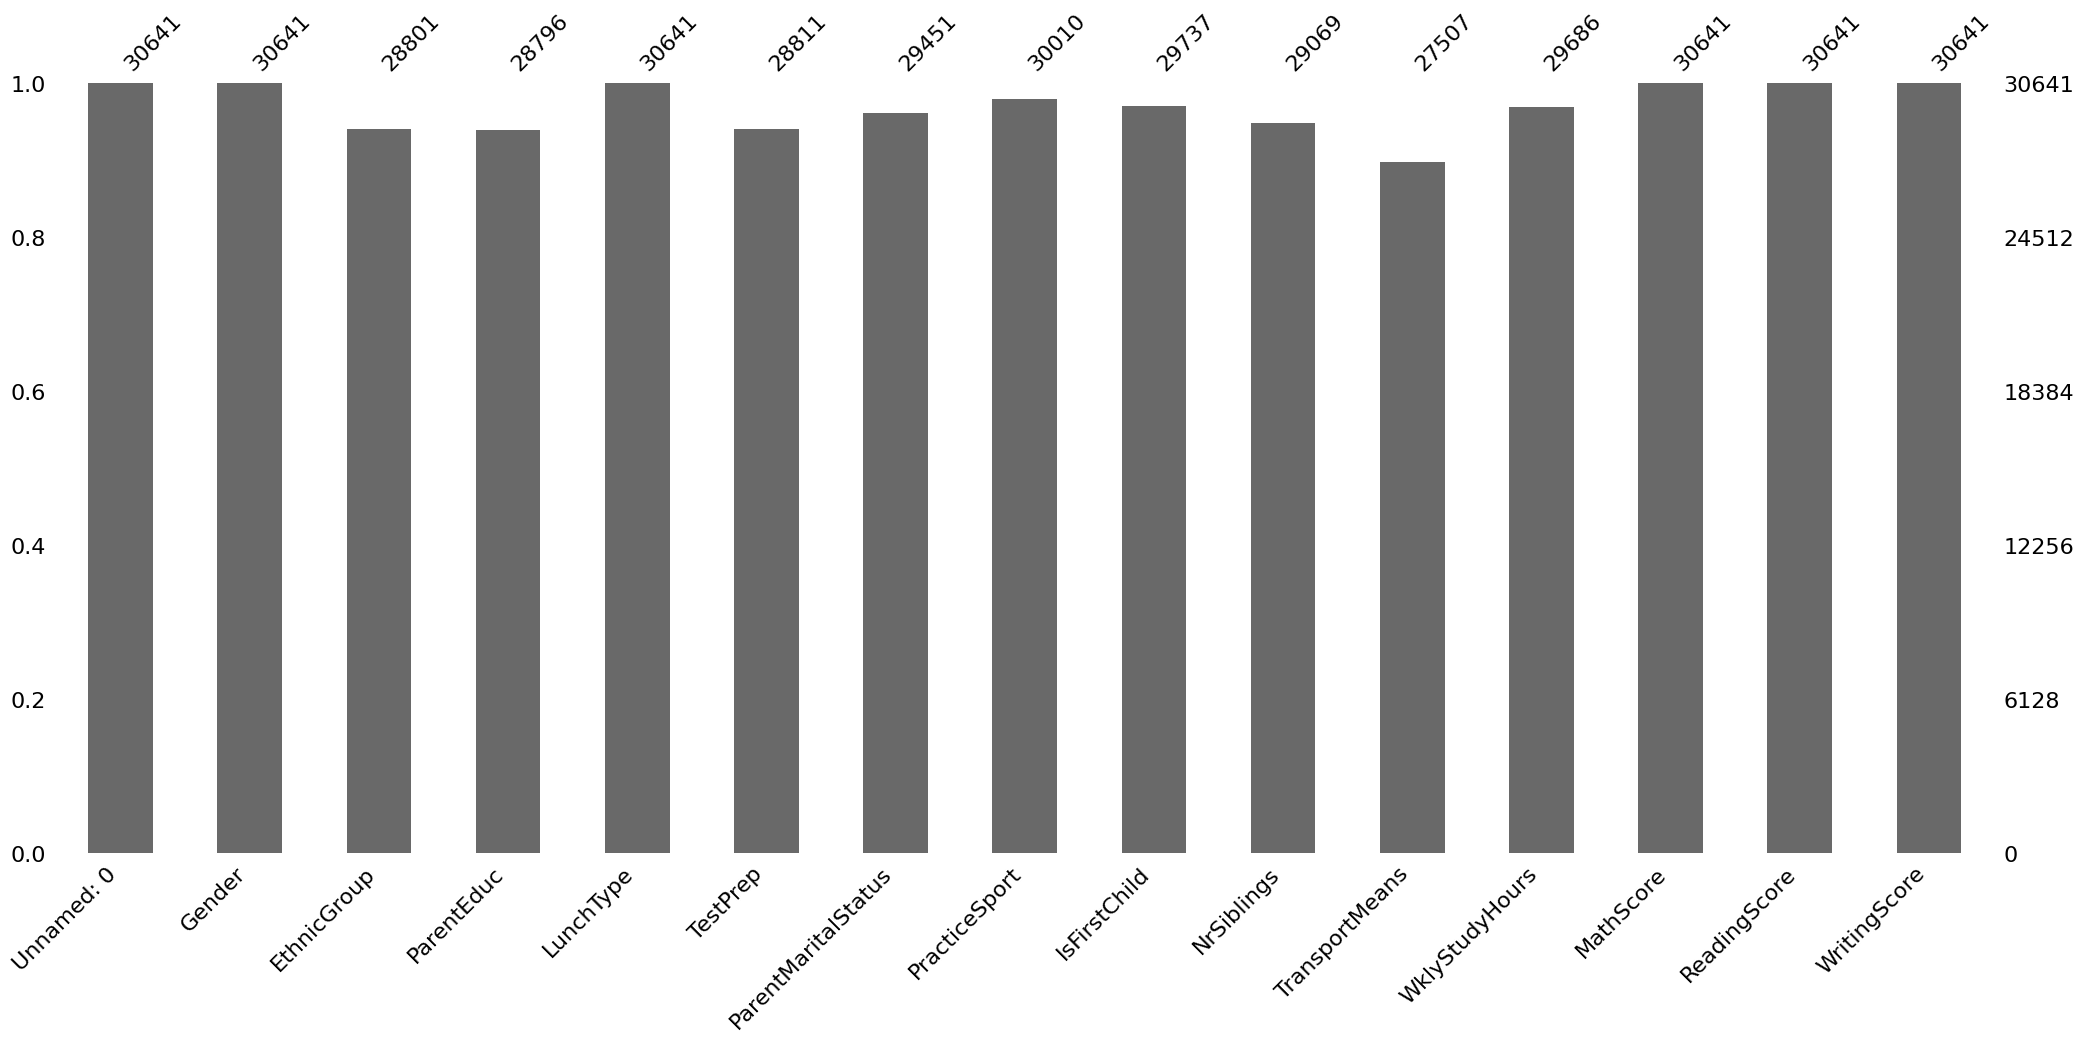

In [ ]:
msno.bar(data)

<Axes: >

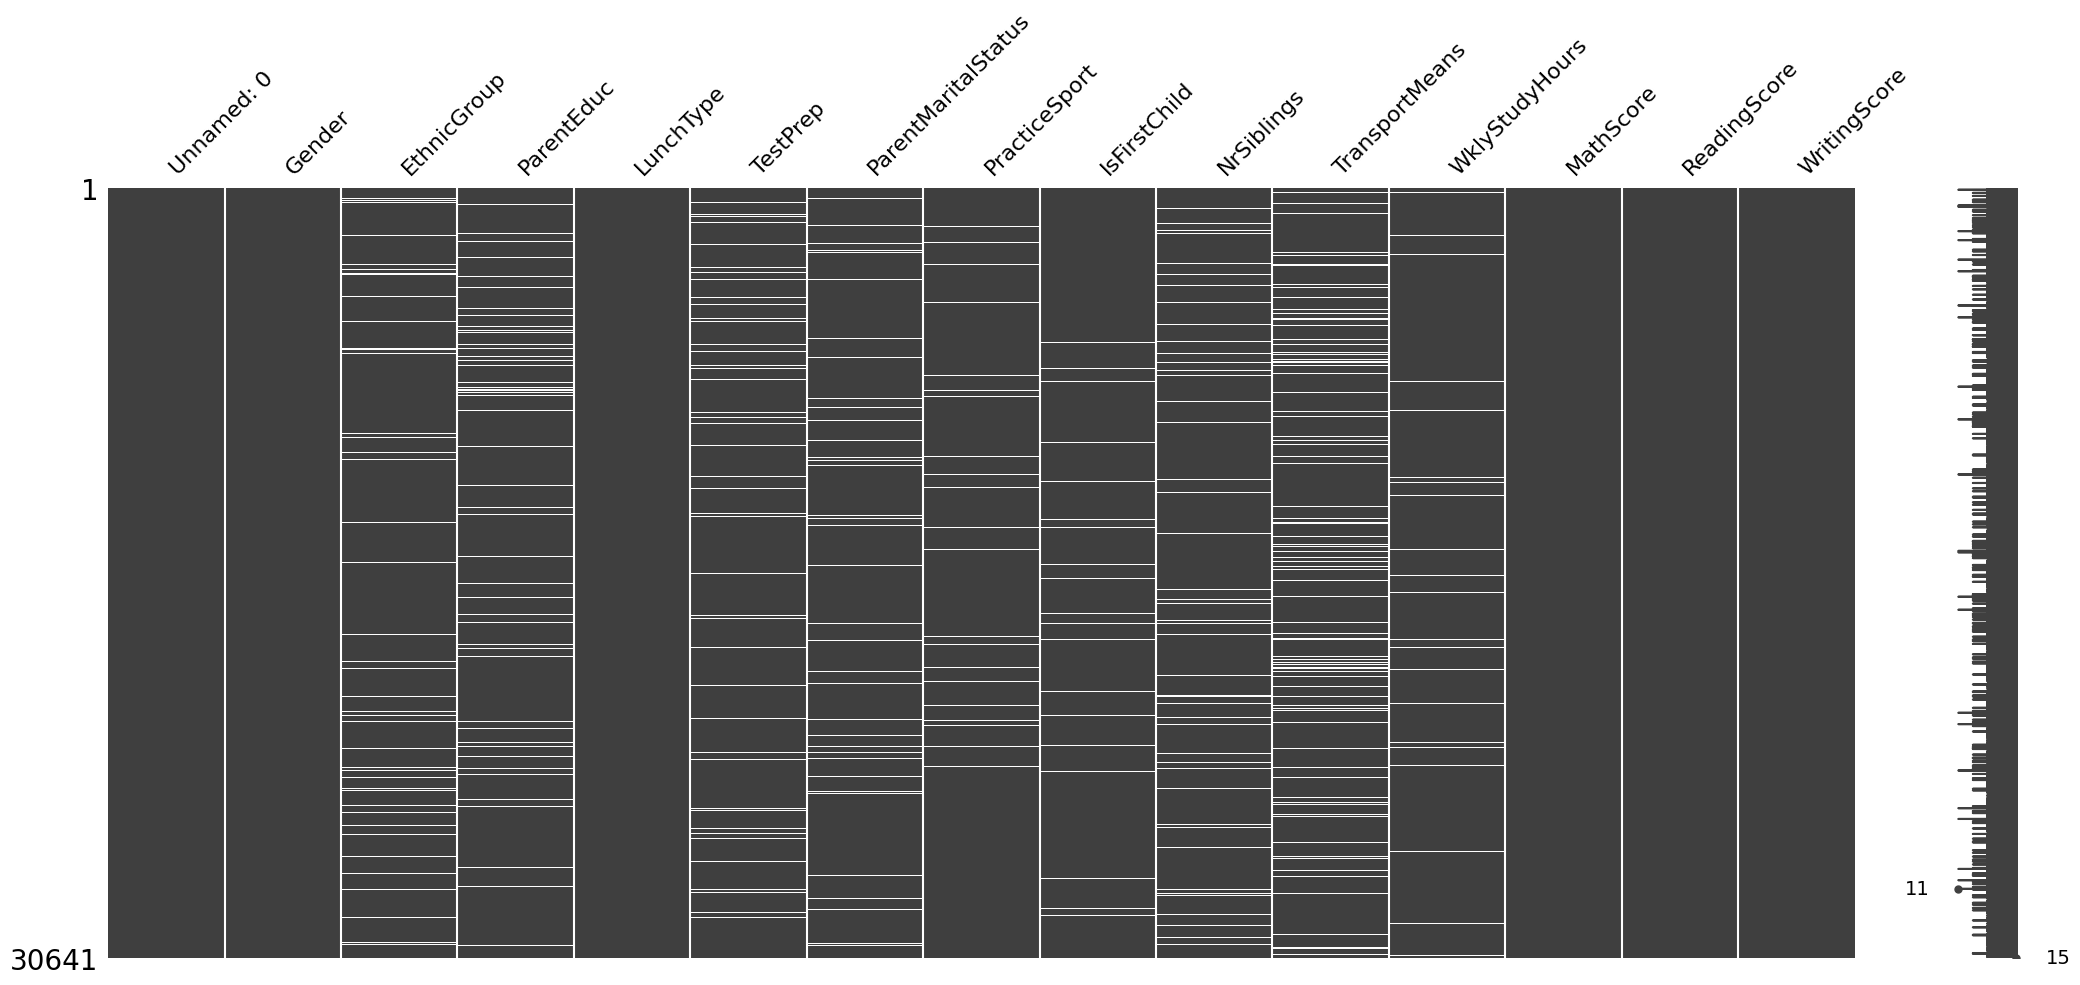

In [ ]:
msno.matrix(data)

<Axes: >

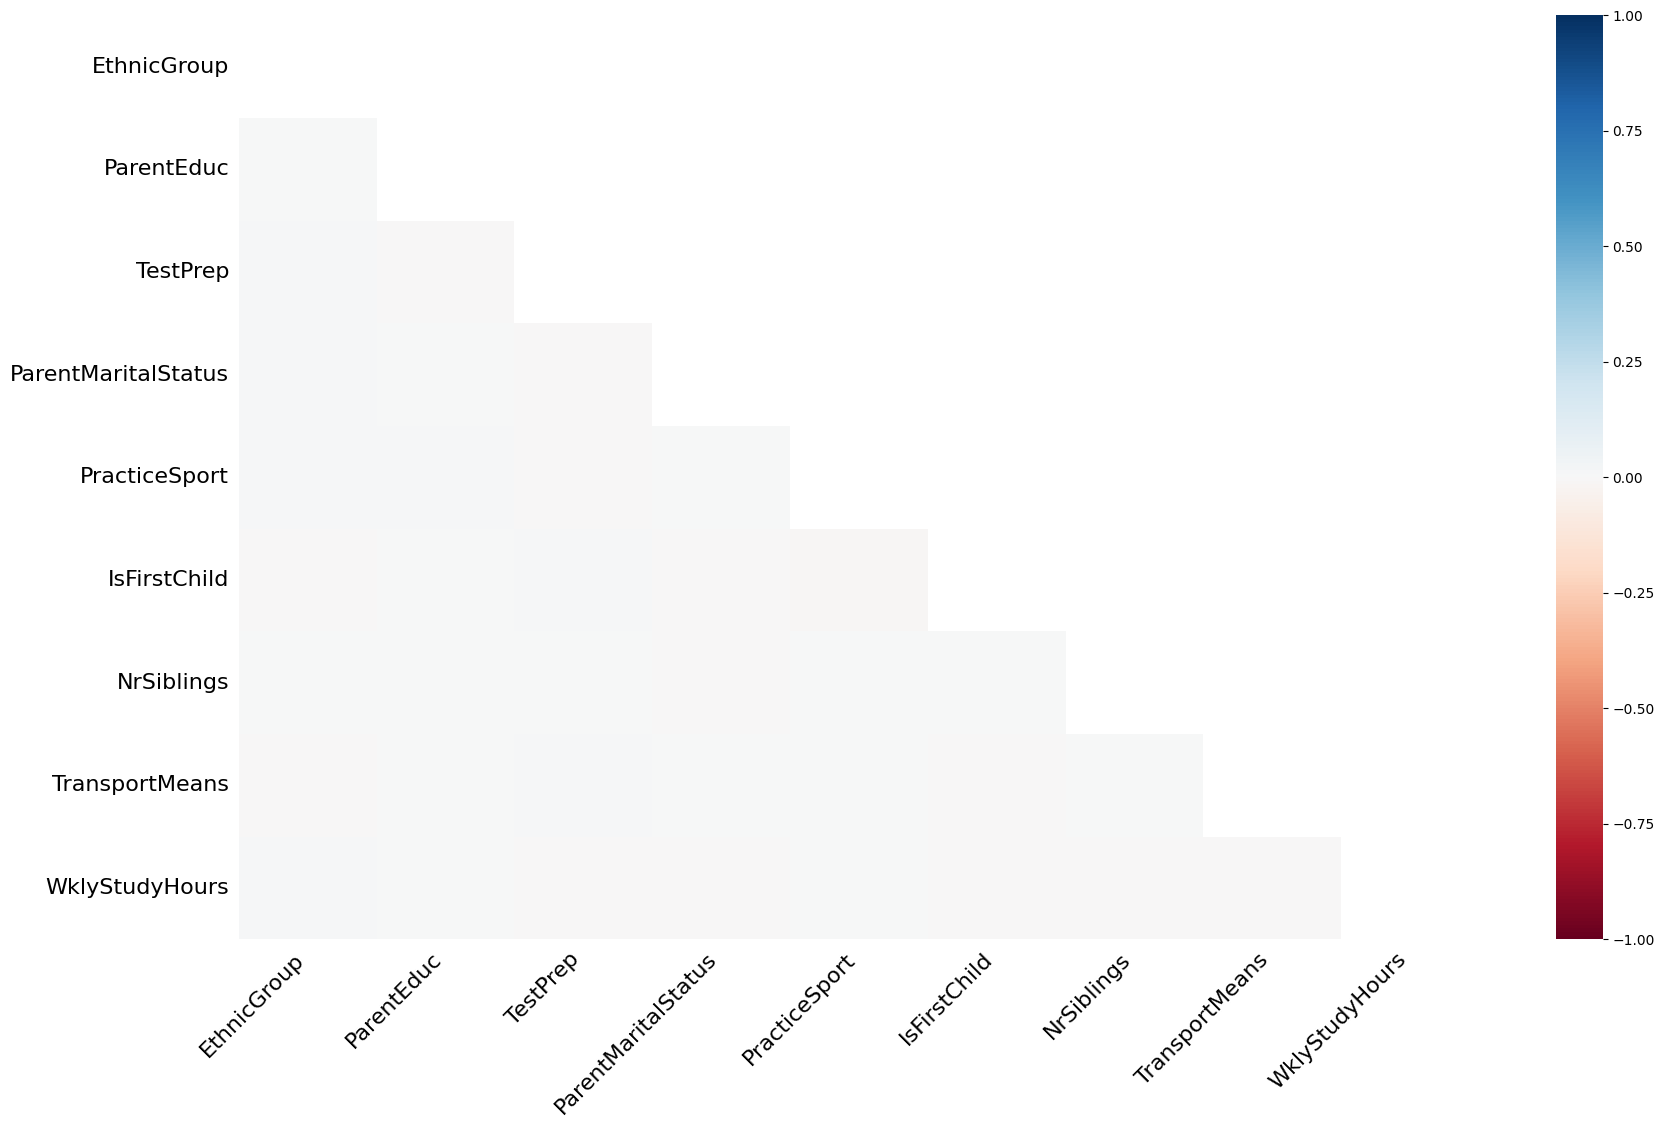

In [ ]:
msno.heatmap(data)

In [ ]:
data.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [ ]:
data.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [ ]:
data = data.drop(columns=['Unnamed: 0'], axis=1)

In [ ]:
data.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

**Encoding**

In [ ]:
encoder = LabelEncoder()

In [ ]:
data['Gender'] = encoder.fit_transform(data['Gender'])

In [ ]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,0,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,0,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,1,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,1,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [ ]:
data['EthnicGroup'] = encoder.fit_transform(data['EthnicGroup'])

In [ ]:
data['target'] = encoder.fit_transform(data['EthnicGroup'])

In [ ]:
# 5 e NaN
data['target'].value_counts()

target
2    9212
3    7503
1    5826
4    4041
0    2219
5    1840
Name: count, dtype: int64

In [ ]:
data['target']

0        5
1        2
2        1
3        0
4        2
        ..
30636    3
30637    4
30638    5
30639    3
30640    1
Name: target, Length: 30641, dtype: int64

In [ ]:
# 5 e NaN, da ne ja izgubime NaN vrednosta
data.loc[data['target'] == 5, 'target'] = np.nan

In [ ]:
data['target']

0        NaN
1        2.0
2        1.0
3        0.0
4        2.0
        ... 
30636    3.0
30637    4.0
30638    NaN
30639    3.0
30640    1.0
Name: target, Length: 30641, dtype: float64

In [ ]:
data['ParentEduc'].value_counts()

ParentEduc
some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: count, dtype: int64

In [ ]:
def encode_education(x):
  if type(x) == float:
    return x
  if "college" in x:
    return 1
  if "high school" in x:
    return 0
  if "associate" in x:
    return 2
  if "bachelor" in x:
    return 3
  if "master" in x:
    return 4

In [ ]:
data['ParentEduc'] = data['ParentEduc'].apply(encode_education)

<Axes: ylabel='Frequency'>

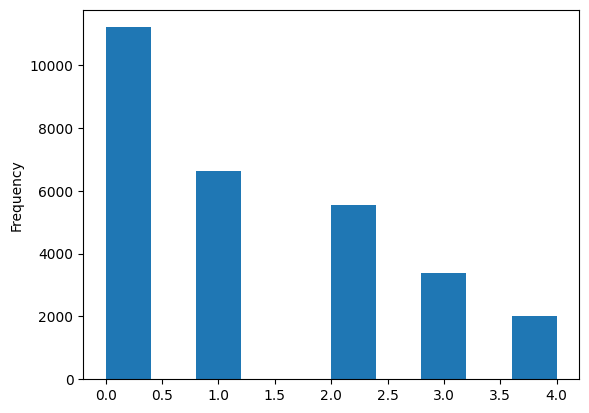

In [ ]:
data['ParentEduc'].plot.hist()

In [ ]:
data['ParentEduc']

0        3.0
1        1.0
2        4.0
3        2.0
4        1.0
        ... 
30636    0.0
30637    0.0
30638    0.0
30639    2.0
30640    1.0
Name: ParentEduc, Length: 30641, dtype: float64

In [ ]:
data.isnull().sum()

Gender                    0
EthnicGroup               0
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
target                 1840
dtype: int64

In [ ]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,target
0,0,5,3.0,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,NaN
1,0,2,1.0,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,2.0
2,0,1,4.0,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,1.0
3,1,0,2.0,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,0.0
4,1,2,1.0,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,2.0


In [ ]:
data['LunchType'].value_counts()

LunchType
standard        19905
free/reduced    10736
Name: count, dtype: int64

In [ ]:
def encode_lunchtype(x):
  if type(x) == float:
    return x
  if "standard" in x:
    return 1
  if "free/reduced" in x:
    return 0

In [ ]:
data['LunchType'] = data['LunchType'].apply(encode_lunchtype)

In [ ]:
data['TestPrep'].value_counts()

TestPrep
none         18856
completed     9955
Name: count, dtype: int64

In [ ]:
def encode_testprep(x):
  if type(x) == float:
    return x
  if "completed" in x:
    return 1
  if "none" in x:
    return 0

In [ ]:
data['TestPrep'] = data['TestPrep'].apply(encode_testprep)

In [ ]:
data['ParentMaritalStatus'].value_counts()

ParentMaritalStatus
married     16844
single       7097
divorced     4919
widowed       591
Name: count, dtype: int64

In [ ]:
data = data.drop(columns=['ParentMaritalStatus'])

In [ ]:
data['PracticeSport'].value_counts()

PracticeSport
sometimes    15213
regularly    10793
never         4004
Name: count, dtype: int64

In [ ]:
def encode_practicesport(x):
  if type(x) == float:
    return x
  if "sometimes" in x:
    return 2
  if "regularly" in x:
    return 1
  if "never" in x:
    return 0

In [ ]:
data['PracticeSport'] = data['PracticeSport'].apply(encode_practicesport)

In [ ]:
data

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,target
0,0,5,3.0,1,0.0,1.0,yes,3.0,school_bus,< 5,71,71,74,NaN
1,0,2,1.0,1,NaN,2.0,yes,0.0,NaN,5 - 10,69,90,88,2.0
2,0,1,4.0,1,0.0,2.0,yes,4.0,school_bus,< 5,87,93,91,1.0
3,1,0,2.0,0,0.0,0.0,no,1.0,NaN,5 - 10,45,56,42,0.0
4,1,2,1.0,1,0.0,2.0,yes,0.0,school_bus,5 - 10,76,78,75,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0,3,0.0,1,0.0,2.0,no,2.0,school_bus,5 - 10,59,61,65,3.0
30637,1,4,0.0,1,0.0,1.0,no,1.0,private,5 - 10,58,53,51,4.0
30638,0,5,0.0,0,1.0,2.0,no,1.0,private,5 - 10,61,70,67,NaN
30639,0,3,2.0,1,1.0,1.0,no,3.0,school_bus,5 - 10,82,90,93,3.0


In [ ]:
data.isnull().sum()

Gender               0
EthnicGroup          0
ParentEduc        1845
LunchType            0
TestPrep          1830
PracticeSport      631
IsFirstChild       904
NrSiblings        1572
TransportMeans    3134
WklyStudyHours     955
MathScore            0
ReadingScore         0
WritingScore         0
target            1840
dtype: int64

In [ ]:
data['IsFirstChild'].value_counts()

IsFirstChild
yes    19082
no     10655
Name: count, dtype: int64

In [ ]:
def encode_firstchild(x):
  if type(x) == float:
    return x
  if "yes" in x:
    return 1
  if "no" in x:
    return 0

In [ ]:
data['IsFirstChild'] = data['IsFirstChild'].apply(encode_firstchild)

In [ ]:
data['NrSiblings'].value_counts()

NrSiblings
1.0    8217
2.0    6790
3.0    6123
0.0    3085
4.0    2941
5.0    1320
6.0     302
7.0     291
Name: count, dtype: int64

In [ ]:
data['TransportMeans'].value_counts()

TransportMeans
school_bus    16145
private       11362
Name: count, dtype: int64

In [ ]:
def encode_firstchild(x):
  if type(x) == float:
    return x
  if "school_bus" in x:
    return 1
  if "private" in x:
    return 0

In [ ]:
data['TransportMeans'] = data['TransportMeans'].apply(encode_firstchild)

In [ ]:
data['WklyStudyHours'].value_counts()

WklyStudyHours
5 - 10    16246
< 5        8238
> 10       5202
Name: count, dtype: int64

In [ ]:
def encode_wklystudy(x):
  if type(x) == float:
    return x
  if "< 5" in x:
    return 0
  if "5 - 10" in x:
    return 1
  if "> 10" in x:
    return 2

In [ ]:
data['WklyStudyHours'] = data['WklyStudyHours'].apply(encode_wklystudy)

In [ ]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,target
0,0,5,3.0,1,0.0,1.0,1.0,3.0,1.0,0.0,71,71,74,NaN
1,0,2,1.0,1,NaN,2.0,1.0,0.0,NaN,1.0,69,90,88,2.0
2,0,1,4.0,1,0.0,2.0,1.0,4.0,1.0,0.0,87,93,91,1.0
3,1,0,2.0,0,0.0,0.0,0.0,1.0,NaN,1.0,45,56,42,0.0
4,1,2,1.0,1,0.0,2.0,1.0,0.0,1.0,1.0,76,78,75,2.0


In [ ]:
# Target e EthnicGroup pa zatoa na kraj ja imame kolonata Target a ova ja briseme
data = data.drop(columns='EthnicGroup')

In [ ]:
data

,Gender,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,target
0,0,3.0,1,0.0,1.0,1.0,3.0,1.0,0.0,71,71,74,NaN
1,0,1.0,1,NaN,2.0,1.0,0.0,NaN,1.0,69,90,88,2.0
2,0,4.0,1,0.0,2.0,1.0,4.0,1.0,0.0,87,93,91,1.0
3,1,2.0,0,0.0,0.0,0.0,1.0,NaN,1.0,45,56,42,0.0
4,1,1.0,1,0.0,2.0,1.0,0.0,1.0,1.0,76,78,75,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0,0.0,1,0.0,2.0,0.0,2.0,1.0,1.0,59,61,65,3.0
30637,1,0.0,1,0.0,1.0,0.0,1.0,0.0,1.0,58,53,51,4.0
30638,0,0.0,0,1.0,2.0,0.0,1.0,0.0,1.0,61,70,67,NaN
30639,0,2.0,1,1.0,1.0,0.0,3.0,1.0,1.0,82,90,93,3.0


In [ ]:
data.isnull().sum()

Gender               0
ParentEduc        1845
LunchType            0
TestPrep          1830
PracticeSport      631
IsFirstChild       904
NrSiblings        1572
TransportMeans    3134
WklyStudyHours     955
MathScore            0
ReadingScore         0
WritingScore         0
target            1840
dtype: int64

Heandle with missing values

In [ ]:
# Vo target kolonata gi birseme NaN vrednostite, briseme rows koi imaat NaN
data = data.dropna(subset='target', axis=0)

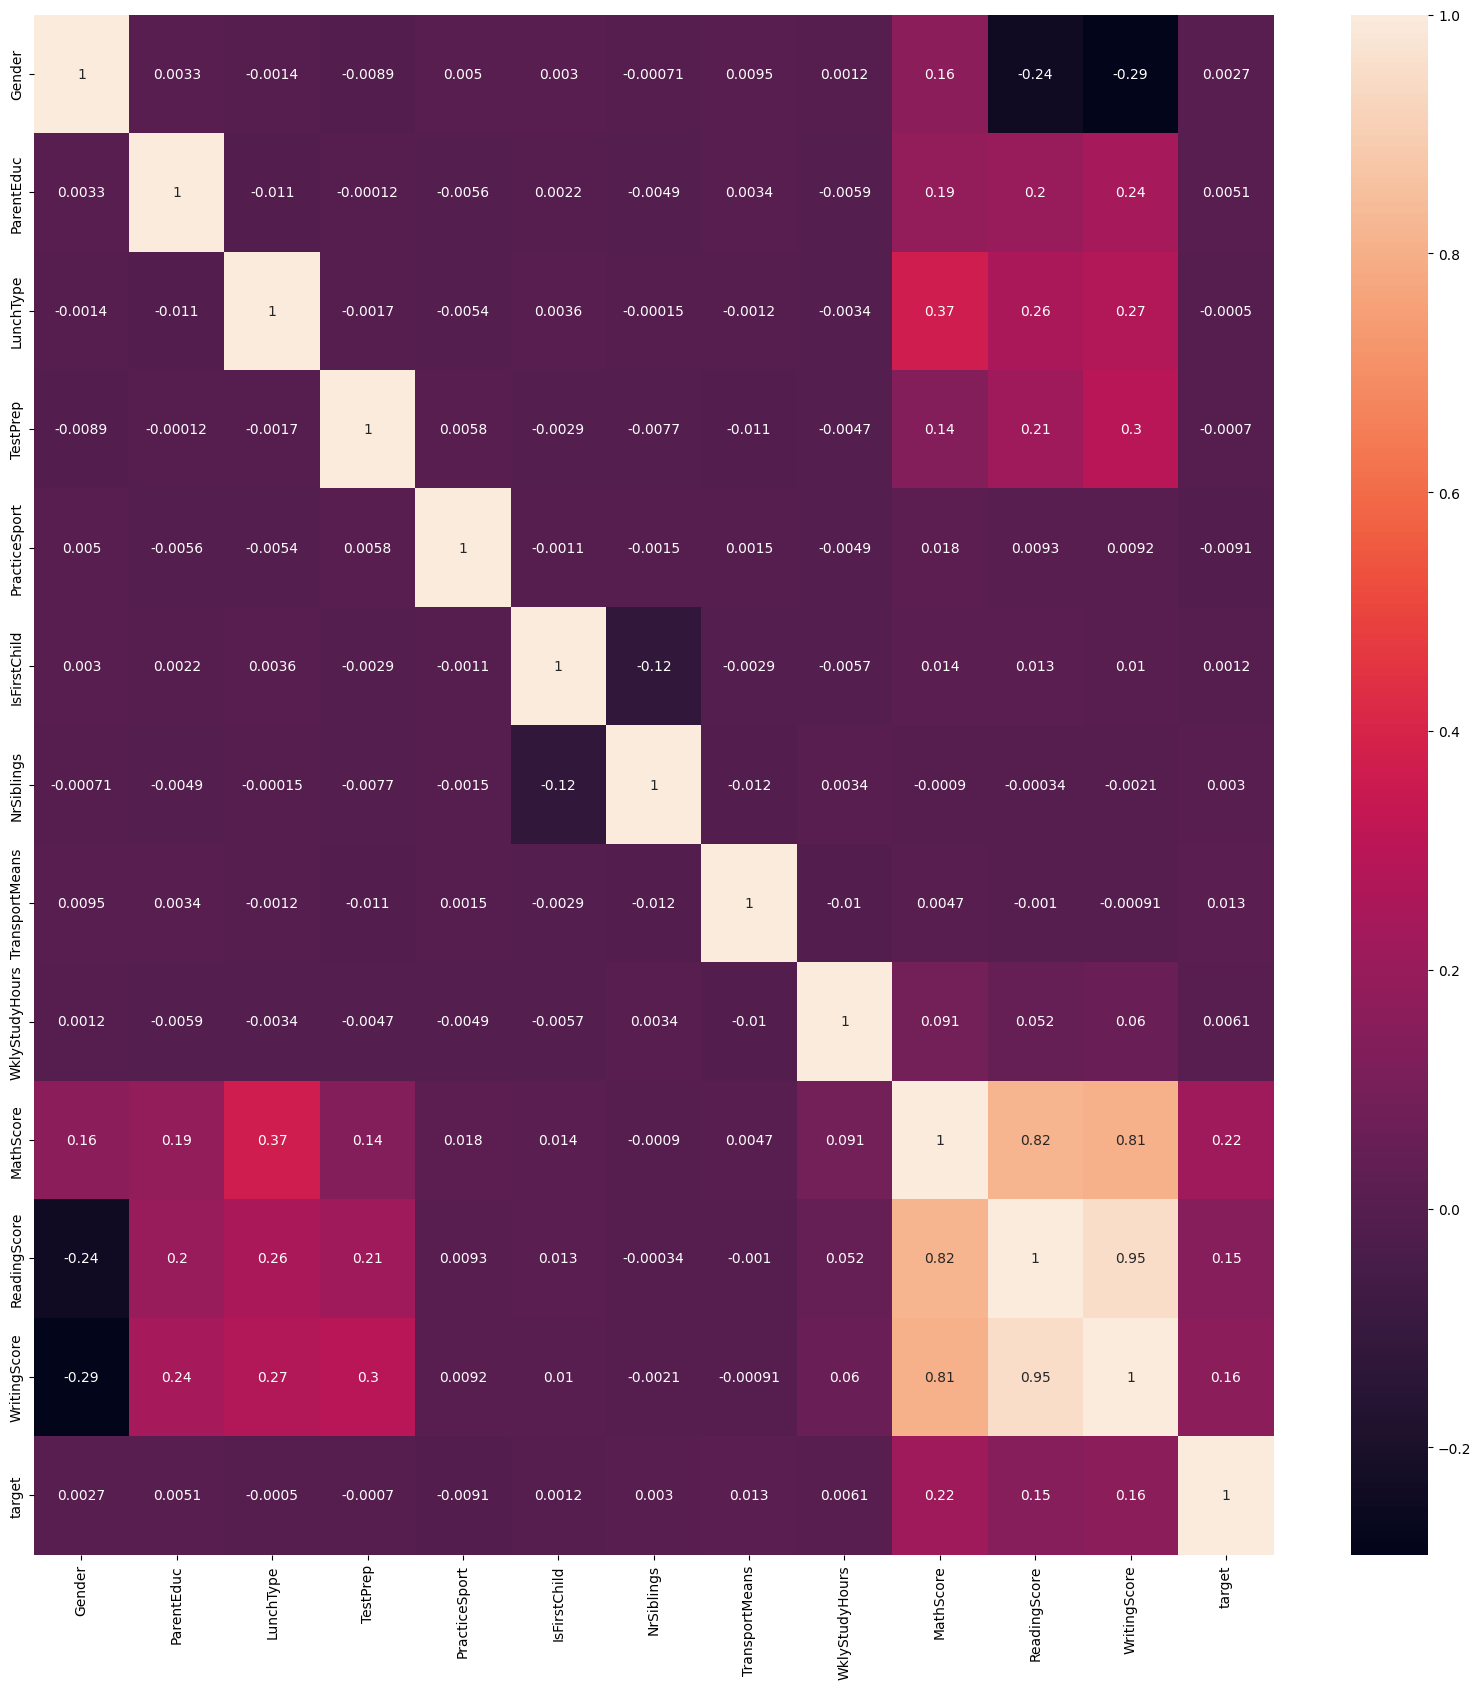

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
data.columns[:12]

Index(['Gender', 'ParentEduc', 'LunchType', 'TestPrep', 'PracticeSport',
       'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours',
       'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

In [ ]:
data.isnull().sum()

Gender               0
ParentEduc        1731
LunchType            0
TestPrep          1706
PracticeSport      583
IsFirstChild       852
NrSiblings        1470
TransportMeans    2947
WklyStudyHours     886
MathScore            0
ReadingScore         0
WritingScore         0
target               0
dtype: int64

In [ ]:
colls_to_fill = data.columns[:12]

In [ ]:
imputer = IterativeImputer()

In [ ]:
data[colls_to_fill] = imputer.fit_transform(data[colls_to_fill])

<ipython-input-124-b22fd1b7a946>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colls_to_fill] = imputer.fit_transform(data[colls_to_fill])


In [ ]:
data.isnull().sum()

Gender            0
ParentEduc        0
LunchType         0
TestPrep          0
PracticeSport     0
IsFirstChild      0
NrSiblings        0
TransportMeans    0
WklyStudyHours    0
MathScore         0
ReadingScore      0
WritingScore      0
target            0
dtype: int64


Train - test split of the dataset (80:20 ratio)


In [ ]:
X, Y = data.drop(columns=['target']), data['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Model training (Use KNN, Logistic regression or Linear regression)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = KNeighborsClassifier(n_neighbors=23)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=23)

In [ ]:
preds = model.predict(X_test)

In [ ]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

         0.0       0.10      0.00      0.01       428
         1.0       0.21      0.14      0.17      1169
         2.0       0.33      0.56      0.41      1913
         3.0       0.27      0.29      0.28      1429
         4.0       0.23      0.05      0.08       822

    accuracy                           0.29      5761
   macro avg       0.23      0.21      0.19      5761
weighted avg       0.26      0.29      0.25      5761




Model Training XGBoost


In [ ]:
clf = XGBClassifier(n_estimators=50, max_depth=4, learning_rate = 0.0001, objective="multi:softmax", num_class=5)

In [ ]:
clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [ ]:
preds = clf.predict(X_test)

In [ ]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       428
         1.0       0.27      0.02      0.04      1169
         2.0       0.35      0.78      0.49      1913
         3.0       0.30      0.24      0.27      1429
         4.0       0.42      0.14      0.21       822

    accuracy                           0.34      5761
   macro avg       0.27      0.24      0.20      5761
weighted avg       0.30      0.34      0.27      5761

